# Investigation 2 - Supervised Learning

## Pattern Recognition MP6122 - Master of Science in Electronics - Emphasis on Embedded Systems

## Costa Rica TEC

Professor: MSc. Felipe Meza
Student: Randy Céspedes Deliyore - ID: 201054417

This notebook would be used to compare the results of doing a bechmark over different supervised learning algorithms over the data set is named **COVID-19 Airline Flight Delays and Cancellations** and can be found [here](https://www.kaggle.com/akulbahl/covid19-airline-flight-delays-and-cancellations).

The processing of this dataset is done in the jupyter notebook named [Investigation2_Cespedes_Randy_PartI.ipynb](https://github.com/rscd27p/Investigacion_2_RP).

The intial dataset was over 600 MB and was reduced to 35 MB.

The dataset would be used to classify delayed flights for their main cause of delay. The classes are:

CC: Carrier Delay.<br/>
WD: Weather Delay.<br/>
ND: NAS Delay.<br/>
SD: Security Delay.<br/>
LAD: Late Aircraft Delay.<br/>

Since there are five different classes, this is considered a _multi-class_ classification problem. 

## Evaluation Metrics or Techniques

Using the right metrics to evaluate an algorithms is key to evaluate their efectivity and have a common ground to compare multiple type of models. The information related to this metric was extracted from this two documents:

$[1]$[20 Popular Machine Learning Metrics. Part 1: Classification & Regression Evaluation Metrics](https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce) by [Shervin Minaee](https://sites.google.com/site/shervinminaee/home), who is a Machine Learning Researcher that holds a PhD in Electrical and Computer Engineering and Computer Science.

$[2]$[Metrics to Evaluate your Machine Learning Algorithm](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234) by [Aditya Mishra](https://medium.com/@adi_myth).

$[3]$[Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) by [Koo Ping Shung](https://koopingshung.com/about/).


### 1- Classification Accuracy (Used)

Both articles agree that is a simple metric that allows to keep track of the **ratio of correct predictions**. This is represented by the equation below:

$ Accurracy = \frac{Number of Correct Predictions}{Total Number of Predictions Made} $

Based on **$[1]$** there is a caveat when using it with samples that belong two different classes. For example, Lets asume that we have two classes:

1-Class A.<br/>
2-Class B.<br/>

If we use 98% of elements of Class A and 2% of Class B in our training set, its possible to get a training accurracy of up to 98%. However, if we use 60% of elements from Class A, and 40% from Class B. We can get a value of up to 60% accuracy, which is a good result. However this does not mean that the system is going to recognize a 100% of the samples all the time.

### 2- Logarithmic Loss (Used)

The logarithmic loss or _log loss_ is used to penalize missclassifications. This works particularly well with multi-class classification algorithm. When using this metric, the classifier must assign a probability for an element belonging to each class for all the samples. The _log loss_ is represented by the following equation:

$ LogarithmicLoss = \frac{-1}{N} \sum_{i=1}^{N}\sum_{j=1}^{M} y_{ij} * log(p_{ij}) $ <br/><br/>
$ N: Samples belonging to M classes $ <br/><br/>
$ M: Classes $ <br/><br/>
$ y_{ij} $ indicates the probability that sample i belongs to class j or not <br/><br/>
$ p_{ij} $ indicates the probability that sample i belongs to class j <br/><br/>

The log loss does not have an upper bound so it means and could have any value from zero to + infinity. The lower the value is to zero the higher is the accuracy.

### 3- Confusion Metric (Used)

A confusion matrix provides a summary of the performance of the whole model. It is easier to use an example to explain it. Lets assume there is a group of 1000 samples that could either be classified as **YES** or **NO**. (This example is adapted from $[2]$).

| Number of Samples= 165 	| Predicted NO 	| Predicted YES 	|
|:----------------------:	|:------------:	|:-------------:	|
|        Actual NO       	|      50      	|       10      	|
|       Actual YES       	|       5      	|      100      	|

Iti s important to understand the four terms in the confusion matrix below:

|   Number of Samples 	|  Predicted NO  	|  Predicted YES 	|
|:----------------------:	|:--------------:	|:--------------:	|
|        Actual NO       	|  True Negative 	| False Positive 	|
|       Actual YES       	| False Negative 	|  True Positive 	|

### 4- F1 Score (Used)

**F1 Score** is a combination of two metrics named:

 - **Precision**: Based on $ [2] $ there are many situations in which the use of the _classification accuracy_ is not a good indicator of performance. For example, in cases where there are multi-class datasets and that there is imbalance, just like in the case of the dataset being used.The idea behind is to create a class-related metric, due to that it has to be done for each class independently and it is define by the following equation:

$ Precision = \frac{True\_Positive}{True\_Positive + False\_Positive} $<br/><br/>

The equation above uses the terms higlighed in the confusion matrix below:

|   Number of Samples 	|  Predicted NO  	|  Predicted YES 	|
|:----------------------:	|:--------------:	|:--------------:	|
|        Actual NO       	|  True Negative 	| <span style="color: red">**False Positive**</span> 	|
|       Actual YES       	| False Negative 	|  <span style="color: red">**True Positive**</span>.	|


 - **Recall**: it is the number of correct positive results divided by the number of all the relevant samples $[1]$. It is define by the following equation:
 
$ Recall = \frac{True\_Positive}{True\_Positive + False\_Positive} $

The equation above uses the terms higlighed in the confusion matrix below:

|   Number of Samples 	|  Predicted NO  	|  Predicted YES 	|
|:----------------------:	|:--------------:	|:--------------:	|
|        Actual NO       	|  True Negative 	| False Positive 	|
|       Actual YES       	| <span style="color: blue">**False Negative**</span> 	|  <span style="color: blue">**True Positive**</span>.	|
 
 <br/><br/>

The equation for the F1 Score is:

$ F1 = 2 * \frac{Precision*Recall}{Precision+Recall} $

**Important:** Precision, Recall and F1 are values between $[0:1]$ that could be represented by percentages by multipying them by a 100.


## Cross Validation and Grid Search

$[4]$[Cross Validation and Grid Search for Model Selection in Python](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/) by [Usman Malik](https://twitter.com/usman_malikk), PhD in artificial Intelligence.

### Cross Validation

In $[4]$ its explained how regularly data is divided into two subgroups:

- **Training Datasets**.
- **Test Datasets**.

It is described how the acurracy obtained with the Training Dataset, used to train the model, could be very different from the one obtained with the Test Sets due to an invariance problems. A solution to this issue is to use K-Fold Cross-Validation. This method is used to divide the dataset into a $ K $ number of subdatasets. Then all the datasets except K-1 are used for training and the remaining dataset is used for testing.

+Insert Image+ https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

### Grid Search

Machine learning models commonly have two kinds of parameters:

- **Learned Parameters:** This parameters are learned by the machine learning model.
- **Hyper Parameters**: The hyper parameters area the ones that are passed to learning model. The comon methodology based on $[4]$ is to randomly set the value of this and which values yield the best results. However, doing this randomly is ineficient and could take a long time. A Grid Search algorithm is one that could help find the best values for these hyper parameters.

## Model Evaluation

The models reviewed in class were:

- **Linear Regression** (Evaluated)
- **Linear Models for Multi-class classification** (Not Evaluated)
- **KNN for classification** (Evaluated)
- **Naive Bayes** (Evaluated)
- **Decision Trees** (Evaluated)
- **Random Forest**(Evaluated)
- **Kernel SVM** (Not Evaluated)

**Note:** The KNN for classification algorithm yielded bad results so it was decided to include another algorith what is good for multiclass classifiers, which is the _Random Forest_.

### Extra Class Model

- **Multi-Layer Perceptron - Neural Network** (Evaluated): This method documentation can be found [here](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron), indicates how this method is good for multiclass classificationa dn one of the major benefits its that it can be updated using a method call **partial fit**, which allows the system to continuesly evolve.

### Import General Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Load Dataset

It is important to divide the dataset into testing and training data. It was decided to use 20% of the data for training and 80% for testing.

In [2]:
# Load dataset

FlightsData = pd.read_csv("cleaned_FL_data.csv",index_col=0,  dtype={"MONTH": np.int8,"DAY_OF_MONTH": np.int8,"DAY_OF_WEEK": np.int8,"MKT_UNIQUE_CARRIER": "string",
                                            "ORIGIN": "string","ORIGIN_CITY_NAME": "string","DEST": "string",
                                           "DEST_CITY_NAME": "string","CRS_DEP_TIME": np.float64,"DEP_DELAY": np.float64,
                                            "TAXI_OUT": np.float64,"WHEELS_OFF": np.float64,"WHEELS_ON": np.float64,
                                           "TAXI_IN": np.float64,"CRS_ARR_TIME": np.float64,"ARR_DELAY": np.float64,
                                           "ACTUAL_ELAPSED_TIME": np.float64,"CRS_ELAPSED_TIME": np.float64,"AIR_TIME": np.float64,
                                           "DISTANCE": np.float64,"CARRIER_DELAY": np.float64,"WEATHER_DELAY": np.float64,
                                           "NAS_DELAY": np.float64,"SECURITY_DELAY": np.float64,"LATE_AIRCRAFT_DELAY": np.float64,
                                          "DELAY_CAUSE": "string"})
# Show a preview of the dataset

FlightsData.head()

,index,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,...,ARR_DELAY_GROUP,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAY_CAUSE
0,0,1,1,3,WN,ONT,"Ontario, CA",SFO,"San Francisco, CA",1810.0,...,4.0,122.0,74.0,363.0,8.0,0.0,27.0,0.0,33.0,LAD
1,7,1,1,3,WN,ONT,"Ontario, CA",SMF,"Sacramento, CA",1505.0,...,3.0,73.0,66.0,390.0,0.0,0.0,0.0,7.0,40.0,LAD
2,14,1,1,3,WN,ORF,"Norfolk, VA",BWI,"Baltimore, MD",1130.0,...,2.0,47.0,36.0,159.0,6.0,0.0,0.0,0.0,36.0,LAD
3,24,1,1,3,WN,PBI,"West Palm Beach/Palm Beach, FL",ISP,"Islip, NY",755.0,...,11.0,152.0,139.0,1052.0,179.0,0.0,0.0,0.0,0.0,CC
4,29,1,1,3,WN,PDX,"Portland, OR",DEN,"Denver, CO",1310.0,...,1.0,140.0,116.0,991.0,28.0,0.0,0.0,0.0,0.0,CC


One important thing to notice is that the data is organized by month (_MONTH_), and day of the month(_DAY_OF_MONTH_). So its a good idea to shuffle the data in order to get a random organization. This step its important to try to get a more evenly distributed group of flights when dividing the dataset into the testing and training groups. The code below uses **sklearn** to shuffle the data.

In [3]:
# The documentation of this function can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

# Import the shuffle utility
from sklearn.utils import shuffle

FlightsData = shuffle(FlightsData, random_state=27) # random_state is a the seed of the random number generation for
# organizing the data.

# Preview of data
FlightsData.head()

,index,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,...,ARR_DELAY_GROUP,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAY_CAUSE
9752,78145,1,19,7,NK,LAS,"Las Vegas, NV",MCI,"Kansas City, MO",940.0,...,1.0,156.0,133.0,1139.0,6.0,0.0,1.0,0.0,18.0,LAD
181725,1684871,3,1,7,DL,SLC,"Salt Lake City, UT",DFW,"Dallas/Fort Worth, TX",1400.0,...,1.0,168.0,120.0,989.0,14.0,0.0,12.0,0.0,0.0,CC
116147,957382,2,7,5,DL,SYR,"Syracuse, NY",ATL,"Atlanta, GA",1206.0,...,4.0,179.0,122.0,794.0,18.0,0.0,25.0,0.0,21.0,ND
130958,1080872,2,3,1,AA,SBP,"San Luis Obispo, CA",PHX,"Phoenix, AZ",1631.0,...,10.0,93.0,74.0,509.0,150.0,0.0,0.0,0.0,0.0,CC
145836,1213401,2,18,2,NK,ATL,"Atlanta, GA",TPA,"Tampa, FL",1201.0,...,1.0,78.0,57.0,406.0,0.0,0.0,25.0,0.0,0.0,ND


As it can be see above the dataset was succesfully shuffled.

**Note:** The last column of the dataset where the type of delay is located. So its necessary to separted it

One of the issues discovered is the fact that the Logistic Regression Model does not take string inputs. So an additional preprocessong must be done. Based on the results of the Part I of this investigation. The string columns have a large amount of classes that we could convert to numbers.

In [4]:
FlightsData[['ORIGIN','MKT_UNIQUE_CARRIER','ORIGIN_CITY_NAME','DEST','DEST_CITY_NAME','DELAY_CAUSE']].describe()

,ORIGIN,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DELAY_CAUSE
count,227679,227679,227679,227679,227679,227679
unique,280,10,274,282,276,5
top,ORD,AA,"Chicago, IL",ORD,"Chicago, IL",CC
freq,12815,70836,14848,11013,12512,87301


For the Delay Type:

|     Column Value    	| Column Value "string" 	| Column Value Numeric 	|
|:-------------------:	|:---------------------:	|:--------------------:	|
|    Carrier Delay    	|           CC          	|           0          	|
|    Weather Delay    	|           WD          	|           1          	|
|      NAS Delay      	|           ND          	|           2          	|
|    Security Delay   	|           SD          	|           3          	|
| Late Aircraft Delay 	|          LAD          	|           4          	|

For the Airlines: 

|    Column Value   	| Column Value "string" 	| Column Value Numeric 	|
|:-----------------:	|:---------------------:	|:--------------------:	|
| American Airlines 	|           AA          	|           0          	|
|  Alaska Airlines  	|           AS          	|           1          	|
|      JetBlue      	|           B6          	|           2          	|
|   Delta Airlines  	|           DL          	|           3          	|
| Frontier Airlines 	|           F9          	|           4          	|
|   Allegiant Air   	|           G4          	|           5          	|
| Hawaiian Airlines 	|           HA          	|           6          	|
|  Spirit Airlines  	|           NK          	|           7          	|
|  United Airlines  	|           UA          	|           8          	|
|     Southwest     	|           WN          	|           9          	|


In [5]:
# Define dictionaries 
DC_dict = {'CC':0,'WD':1,'ND':2,'SD':3,'LAD':4}
MUC_dict = {'AA':0,'AS':1,'B6':2,'DL':3,'F9':4,'G4':5,'HA':6,'NK':7,'UA':8,'WN':9,}

# Replace delay cause and airline values to numbers
FlightsData[['DELAY_CAUSE']] = [DC_dict[item] for item in FlightsData['DELAY_CAUSE']]
FlightsData[['MKT_UNIQUE_CARRIER']] = [MUC_dict[item] for item in FlightsData['MKT_UNIQUE_CARRIER']]

The method above could be apply to columns with a small number of unique classes. However, for the ORIGIN, ORIGIN_CITY_NAME, DEST , and DEST_CITY_NAME columns it is not feasable to do it manually. Due to that the methodology described in the document named [Python | Convert two lists into a dictionary](https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/) would be used.

In [6]:
# Define Lists of Classes for each column

origin_classes = FlightsData[['ORIGIN']].value_counts().index.levels[0]
origincitynames_classes = FlightsData[['ORIGIN_CITY_NAME']].value_counts().index.levels[0]
dest_classes = FlightsData[['DEST']].value_counts().index.levels[0]
destcitynames_classes = FlightsData[['DEST_CITY_NAME']].value_counts().index.levels[0]

# Create dictionaries indexes lists based on the lenght of the list of classes above.

origin_classes_idxs = list(range(0,len(origin_classes)))
origincitynames_classes_idxs = list(range(0,len(origincitynames_classes)))
dest_classes_idxs = list(range(0,len(dest_classes)))
destcitynames_classes_idxs = list(range(0,len(destcitynames_classes)))

# build dictionaries
# ORIGIN
origin_dict = {}
for key in origin_classes: 
    for value in origin_classes_idxs: 
        origin_dict[key] = value 
        origin_classes_idxs.remove(value) 
        break
# ORIGIN_CITY_NAME
origincitynames_dict = {}
for key in origincitynames_classes: 
    for value in origincitynames_classes_idxs: 
        origincitynames_dict[key] = value 
        origincitynames_classes_idxs.remove(value) 
        break
# DEST        
dest_dict = {}
for key in dest_classes: 
    for value in dest_classes_idxs: 
        dest_dict[key] = value 
        dest_classes_idxs.remove(value) 
        break
# DEST_CITY_NAME        
destcitynames_dict = {}
for key in destcitynames_classes: 
    for value in destcitynames_classes_idxs: 
        destcitynames_dict[key] = value 
        destcitynames_classes_idxs.remove(value) 
        break

# Replace delay cause values to numbers
FlightsData['ORIGIN'] = [origin_dict[item] for item in FlightsData['ORIGIN']]
FlightsData['ORIGIN_CITY_NAME'] = [origincitynames_dict[item] for item in FlightsData['ORIGIN_CITY_NAME']]
FlightsData['DEST'] = [dest_dict[item] for item in FlightsData['DEST']]
FlightsData['DEST_CITY_NAME'] = [destcitynames_dict[item] for item in FlightsData['DEST_CITY_NAME']]

# Preview the data
FlightsData[['ORIGIN','MKT_UNIQUE_CARRIER','ORIGIN_CITY_NAME','DEST','DEST_CITY_NAME','DELAY_CAUSE']].describe()

,ORIGIN,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DELAY_CAUSE
count,227679.000000,227679.000000,227679.000000,227679.000000,227679.000000,227679.000000
mean,129.381748,3.877152,126.019330,132.434274,130.754663,1.950334
std,76.919137,3.539755,78.144612,77.615793,78.837391,1.757194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,0.000000,49.000000,64.000000,59.000000,0.000000
50%,130.000000,3.000000,125.000000,137.000000,138.000000,2.000000
75%,191.000000,8.000000,194.000000,199.000000,198.000000,4.000000
max,279.000000,9.000000,273.000000,281.000000,275.000000,4.000000


In [7]:
# Get Results column
delay_results = FlightsData['DELAY_CAUSE']
# Get Parameters
delay_parameters = FlightsData.drop(columns = 'DELAY_CAUSE')

# Print Data Frame shape

print("Delay results size: " + str(delay_results.shape))
print("Delay Parameters size: " + str(delay_parameters.shape))

Delay results size: (227679,)
Delay Parameters size: (227679, 27)


As it can be seen above, the results and parameters have the right shape.

## Logistic Regression in Python

The logistic regression is the first type of classification algorithm to be tested. The online document named [Logistic Regression in Python](https://realpython.com/logistic-regression-python/) by Mirk Stojiljkovic was used as reference.

In the section below the sklearn logistic regression model is imported and also some metric utilities like a confussion matrix, and a classification report. The classification report documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). This report provides all the information below for each class. This would be very useful to avoid having to manually calculate this metrics.

- **Precision**.
- **Recall**.
- **F1 Score**.

The code below is to create the model.

In [8]:
# import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Import Classification Report and Confussion Matrix
from sklearn.metrics import classification_report, confusion_matrix

# Create Logistic Regression Model
LR_model =  LogisticRegression(solver='liblinear', random_state=0, multi_class = 'auto',max_iter=200)

# Also the muti_class option was selected to ovr based on the fact that there is a binary fit for each label.
# this was choosen on the same document above.

It is imporant to separete the data in train and test data. It was decided to use the *train_test_split* utility from sklearn documented [here](https://realpython.com/train-test-split-python-data/).

In [9]:
# Import train_test_split utility

from sklearn.model_selection import train_test_split

# As it described here: https://realpython.com/train-test-split-python-data/ it is possible separate both input, 
# output data at the same time.

delay_parameters_train, delay_parameters_test, delay_results_train, delay_results_test = train_test_split(
    delay_parameters, delay_results, test_size = 0.2, random_state = 25) # Train 80%, Test 20%

Train the model. **Note:** This process could take a long time. Up to 5 minutes depending on your system resources.

In [10]:
LR_model.fit(delay_parameters_train, delay_results_train)

LogisticRegression(max_iter=200, random_state=0, solver='liblinear')

Now that the model has been compiles the next step is to evaluate its performance for the model.

In [11]:
print("Training set score: {:.3f}".format(LR_model.score(delay_parameters_train, delay_results_train)))
print("Test set score: {:.3f}".format(LR_model.score(delay_parameters_test, delay_results_test)))

Training set score: 0.971
Test set score: 0.969


Now we will evaluate the rest of the metrics, starting by the confusion matrix. For this we will use the sklearn confusion matrix imported at the beggining of this section.

Confusion Matrix Logistic Regression
[[9.88698944e-01 0.00000000e+00 6.25286829e-03 0.00000000e+00
  5.04818724e-03]
 [4.16666667e-03 9.20833333e-01 4.27083333e-02 0.00000000e+00
  3.22916667e-02]
 [2.90002257e-02 2.25682690e-04 9.22703679e-01 0.00000000e+00
  4.80704130e-02]
 [2.75229358e-02 0.00000000e+00 1.74311927e-01 1.92660550e-01
  6.05504587e-01]
 [2.55620752e-03 0.00000000e+00 1.33038982e-02 0.00000000e+00
  9.84139894e-01]]


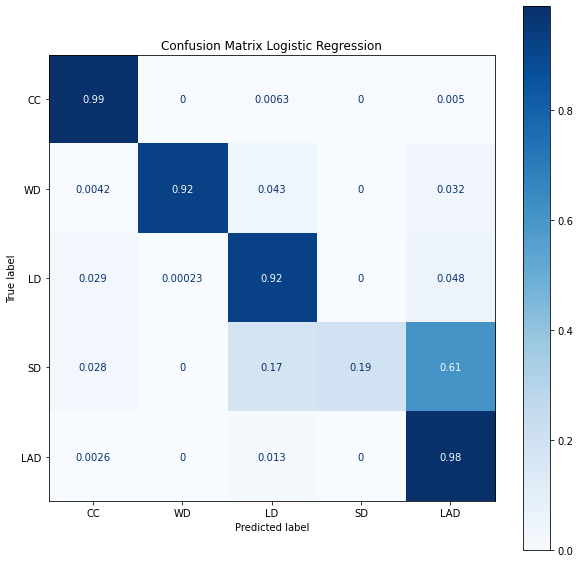

In [12]:
# import multi label confusion matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix


# Confusion Matrix
disp, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(LR_model,delay_parameters_test, delay_results_test,labels = 
                             [0,1,2,3,4],cmap=plt.cm.Blues,ax=ax,normalize='true')

# Plot confusion matrix
title = "Confusion Matrix Logistic Regression"

ax.set_title(title)
x_ticks_labels = ['CC','WD','LD','SD','LAD']
plt.xticks([0,1,2,3,4],x_ticks_labels)
plt.yticks([0,1,2,3,4],x_ticks_labels)
print(title)
print(disp.confusion_matrix)

plt.show()

As it can be seen above the results are quite good. Unfortunately there were not a lot of elements from the SD class. Now we would compute the rest of the metrics.

In [13]:
from sklearn.metrics import classification_report

# Class names

delay_results_test_predicted = LR_model.predict(delay_parameters_test)

class_names = ['CC','WD','LD','SD','LAD']
print(classification_report(delay_results_test, delay_results_test_predicted, target_names=class_names))

              precision    recall  f1-score   support

          CC       0.98      0.99      0.99     17432
          WD       1.00      0.92      0.96      1920
          LD       0.95      0.92      0.94      8862
          SD       1.00      0.19      0.32       109
         LAD       0.96      0.98      0.97     17213

    accuracy                           0.97     45536
   macro avg       0.98      0.80      0.84     45536
weighted avg       0.97      0.97      0.97     45536



The results for most of the classes were over 90%, which means that the model was good at predicting delay causes. However, the LD class had a very little amount of samples so the result ended up with a low F1 score of only 32%.

We will calculate the **Log Loss** now

In [14]:
# Import Log Loss

from sklearn.metrics import log_loss

# Calculate Predict Probability

delay_results_test_prep = LR_model.predict_log_proba(delay_parameters_test) 

# This provides the probability of each flight belonging to one of the five classes.

LogLoss = log_loss(delay_results_test, delay_results_test_prep)

# Pring Results

print("Log Loss: {:.3f}".format((LogLoss)))

Log Loss: 1.609


**Summary of Results**

|      Model Name     	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:-------------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
| Logistic Regression 	|   0.969  	|   1.609  	|   0.84   	|    0.98   	|  0.80  	|


## KNN for classification

The K nearest neighbors algoritm is another classification model. In the section below we configure the model. However, since the K has a dirrect in accuracy we would perform a procedure similar to what was done in class to estimate which number of neighbor K has the best accuracy with the Test and Training data.

**Note:** The process below could take up to 5 minutes.

Training set score: 1.000 -> K = 1
Test set score: 0.503 -> K = 1
Training set score: 0.756 -> K = 2
Test set score: 0.478 -> K = 2
Training set score: 0.726 -> K = 3
Test set score: 0.511 -> K = 3
Training set score: 0.688 -> K = 4
Test set score: 0.509 -> K = 4
Training set score: 0.666 -> K = 5
Test set score: 0.510 -> K = 5
Training set score: 0.648 -> K = 6
Test set score: 0.515 -> K = 6
Training set score: 0.638 -> K = 7
Test set score: 0.515 -> K = 7
Training set score: 0.626 -> K = 8
Test set score: 0.517 -> K = 8
Training set score: 0.618 -> K = 9
Test set score: 0.519 -> K = 9
Training set score: 0.613 -> K = 10
Test set score: 0.519 -> K = 10


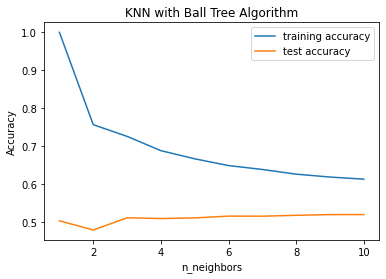

In [15]:
# Import K Nearest Neighbors 
from sklearn.neighbors import KNeighborsClassifier

# Setup Test and Train Data

delay_parameters_train, delay_parameters_test, delay_results_train, delay_results_test = train_test_split(
    delay_parameters, delay_results, test_size = 0.2, random_state = 25) # Train 80%, Test 20%

# Train Model for multiple K values 
# This was adapted from the class example here: https://sites.google.com/view/mp6122-tec-1q21/class-2

# Setup Arrays to keep accuracy data
Train_Accuracy_KNN = []
Test_Accuracy_KNN = []
Log_Loss_KNN = []

neighbors_settings = range(1, 11) # Test up to 10
for n_neighbors in neighbors_settings:
    # Setup Model with "Ball Three Algorithm"
    
    KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm='ball_tree', leaf_size = 30)
    KNN_model.fit(delay_parameters_train, delay_results_train)
    
    # Pring Accuracy Results
    
    train_acc= KNN_model.score(delay_parameters_train, delay_results_train)
    Train_Accuracy_KNN.append(train_acc)
    
    test_acc = KNN_model.score(delay_parameters_test, delay_results_test)
    Test_Accuracy_KNN.append(test_acc)
    
    print("Training set score: {:.3f}".format(train_acc) + " -> K = " + str(n_neighbors))
    print("Test set score: {:.3f}".format(test_acc)+ " -> K = " + str(n_neighbors))
    
    
plt.plot(neighbors_settings, Train_Accuracy_KNN, label="training accuracy")
plt.plot(neighbors_settings, Test_Accuracy_KNN, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("KNN with Ball Tree Algorithm")
plt.legend()

As it can bee seen above the use of "ball tree" algoritm was not very succesful. The _kd_tree_ algorithm would be tried next. **Note:** The process below could take up to 5 minutes.

Training set score: 1.000 -> K = 1
Test set score: 0.503 -> K = 1
Training set score: 0.756 -> K = 2
Test set score: 0.478 -> K = 2
Training set score: 0.726 -> K = 3
Test set score: 0.511 -> K = 3
Training set score: 0.688 -> K = 4
Test set score: 0.509 -> K = 4
Training set score: 0.666 -> K = 5
Test set score: 0.510 -> K = 5
Training set score: 0.648 -> K = 6
Test set score: 0.515 -> K = 6
Training set score: 0.638 -> K = 7
Test set score: 0.515 -> K = 7
Training set score: 0.626 -> K = 8
Test set score: 0.517 -> K = 8
Training set score: 0.618 -> K = 9
Test set score: 0.519 -> K = 9
Training set score: 0.613 -> K = 10
Test set score: 0.519 -> K = 10


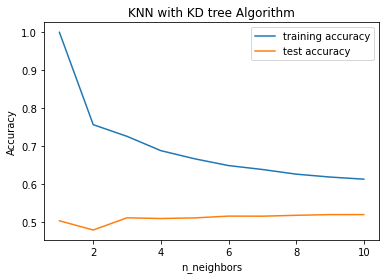

In [17]:
# Train Model for multiple K values 
# This was adapted from the class example here: https://sites.google.com/view/mp6122-tec-1q21/class-2

# Setup Arrays to keep accuracy data
Train_Accuracy_KNN = []
Test_Accuracy_KNN = []
Log_Loss_KNN = []

neighbors_settings = range(1, 11) # Test up to 10
for n_neighbors in neighbors_settings:
    # Setup Model with "Ball Three Algorithm"
    
    KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm='kd_tree', leaf_size = 30)
    KNN_model.fit(delay_parameters_train, delay_results_train)
    
    # Pring Accuracy Results
    
    train_acc= KNN_model.score(delay_parameters_train, delay_results_train)
    Train_Accuracy_KNN.append(train_acc)
    
    test_acc = KNN_model.score(delay_parameters_test, delay_results_test)
    Test_Accuracy_KNN.append(test_acc)
    
    print("Training set score: {:.3f}".format(train_acc) + " -> K = " + str(n_neighbors))
    print("Test set score: {:.3f}".format(test_acc)+ " -> K = " + str(n_neighbors))
    
    
plt.plot(neighbors_settings, Train_Accuracy_KNN, label="training accuracy")
plt.plot(neighbors_settings, Test_Accuracy_KNN, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("KNN with KD tree Algorithm")
plt.legend()

The result of using **KD Tree** is basically the same and it appears that the number of neighbors does not have an effect on how good the algorithm is. We would try with the "auto" setting in the algorithm parameter and with a large number of neighbors like a 100.

**Note:** The process could take up to 5 minutes.

In [20]:
# Setup Model with "Ball Three Algorithm"

KNN_model = KNeighborsClassifier(n_neighbors=100, algorithm='auto', leaf_size = 50)
KNN_model.fit(delay_parameters_train, delay_results_train)

# Pring Accuracy Results

train_acc= KNN_model.score(delay_parameters_train, delay_results_train)

test_acc = KNN_model.score(delay_parameters_test, delay_results_test)

print("\nTraining set score: {:.3f}".format(train_acc) + "\t -> K = " + str(100))
print("\nTest set score: {:.3f}".format(test_acc)+ "\t\t -> K = " + str(100))


Training set score: 0.528	 -> K = 100

Test set score: 0.515		 -> K = 100


As it can be seen above the number of neighbors practically had no effect in the result. The rest of the metrics would be calculated.

Confusion Matrix KNN Neighbors K=100
[[0.54394218 0.00097522 0.0511129  0.         0.40396971]
 [0.57083333 0.0125     0.07291667 0.         0.34375   ]
 [0.34676145 0.00124125 0.15730084 0.         0.49469646]
 [0.48623853 0.         0.09174312 0.         0.42201835]
 [0.21954337 0.         0.05164701 0.         0.72880962]]


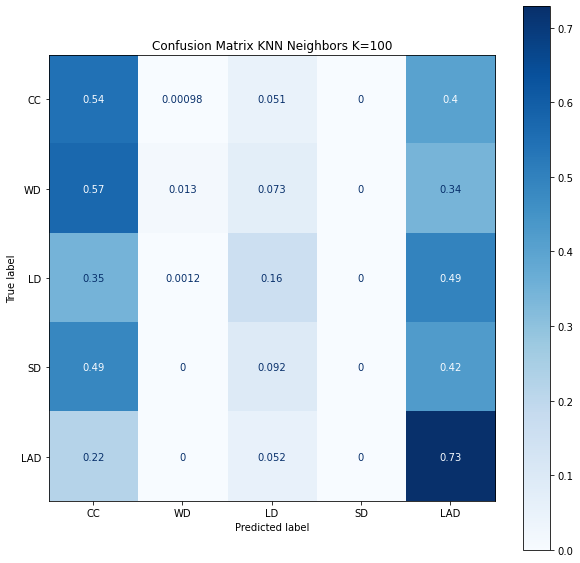

In [21]:
# Confusion Matrix
disp, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(KNN_model,delay_parameters_test, delay_results_test,labels = [0,1,2,3,4],
                             cmap=plt.cm.Blues,ax=ax,normalize='true')

# Plot confusion matrix
title = "Confusion Matrix KNN Neighbors K=100"

ax.set_title(title)
x_ticks_labels = ['CC','WD','LD','SD','LAD']
plt.xticks([0,1,2,3,4],x_ticks_labels)
plt.yticks([0,1,2,3,4],x_ticks_labels)
print(title)
print(disp.confusion_matrix)

plt.show()

In [22]:
# Calculate Predict Probability

delay_results_test_prep = KNN_model.predict_proba(delay_parameters_test) 

# This provides the probability of each flight belonging to one of the five classes.

LogLoss = log_loss(delay_results_test, delay_results_test_prep)

# Print Results

print("Log Loss KNN: {:.3f}".format((LogLoss)))

# Class names

delay_results_test_predicted = KNN_model.predict(delay_parameters_test)

class_names = ['CC','WD','LD','SD','LAD']
print(classification_report(delay_results_test, delay_results_test_predicted, target_names=class_names))

Log Loss KNN: 1.168
              precision    recall  f1-score   support

          CC       0.54      0.54      0.54     17432
          WD       0.46      0.01      0.02      1920
          LD       0.42      0.16      0.23      8862
          SD       0.00      0.00      0.00       109
         LAD       0.51      0.73      0.60     17213

    accuracy                           0.51     45536
   macro avg       0.39      0.29      0.28     45536
weighted avg       0.50      0.51      0.48     45536



/home/rscd27/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Summary of Results

|        Model Name        	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:------------------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
| KNN Classification k=100 	|   0.515  	|   1.168  	|   0.48   	|    0.50   	|  0.51  	|


The results were not good relativily to the other algorithms, the **SD** class was particularly affected due to having a small weight compared to the other ones.

## Categorical Naive Bayes

Documentation for the method can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html).

All of the metrics would be calculated and presented below:

In [24]:
# Import Model

from sklearn.naive_bayes import GaussianNB

# Setup Test and Train Data

delay_parameters_train, delay_parameters_test, delay_results_train, delay_results_test = train_test_split(
    delay_parameters, delay_results, test_size = 0.20, random_state = 25) # Train 80%, Test 20%

print("\ndelay_parameters_test shape: " + str(delay_parameters_test.shape) + "\n")
print("\ndelay_results_test shape: " + str(delay_results_test.shape) + "\n")

# Calculate Classes weights
class_counts = delay_results_test.value_counts()
class_counts_total = delay_results_test.value_counts().sum()
class_weights = []
for idx in range(0,len(class_counts)):
    class_weight = class_counts[idx] / class_counts_total
    class_weights.append(class_weight)

print("Class weights: " + str(class_weights))

# Class labels
class_labels = ['CC','WD','LD','SD','LAD']

# Setup Model

GaussNB_model = GaussianNB()
GaussNB_model.fit(delay_parameters_train, delay_results_train)

# Calculate Accuracy

print("Training set score Naive Bayes: {:.3f}".format(GaussNB_model.score(delay_parameters_train, delay_results_train)))

print("Test set score Naive Bayes: {:.3f}".format(GaussNB_model.score(delay_parameters_test, delay_results_test)))


delay_parameters_test shape: (45536, 27)


delay_results_test shape: (45536,)

Class weights: [0.3828179901616304, 0.0421644413211525, 0.19461524947294448, 0.0023937104708362613, 0.3780086085734364]
Training set score Naive Bayes: 0.739
Test set score Naive Bayes: 0.736


The training and test score are 73.9% and 73.8% respectively. This method had better results than the KNN one.

Confusion Matrix Naive Bayes NB
[[6.68081689e-01 0.00000000e+00 6.95846719e-02 1.31941257e-03
  2.61014227e-01]
 [1.36458333e-01 4.58854167e-01 1.07291667e-01 5.20833333e-04
  2.96875000e-01]
 [6.66892349e-02 1.12841345e-04 6.84834123e-01 4.51365380e-04
  2.47912435e-01]
 [3.02752294e-01 0.00000000e+00 1.46788991e-01 8.25688073e-02
  4.67889908e-01]
 [6.82042642e-02 2.32382502e-04 6.61128217e-02 4.06669378e-04
  8.65043862e-01]]


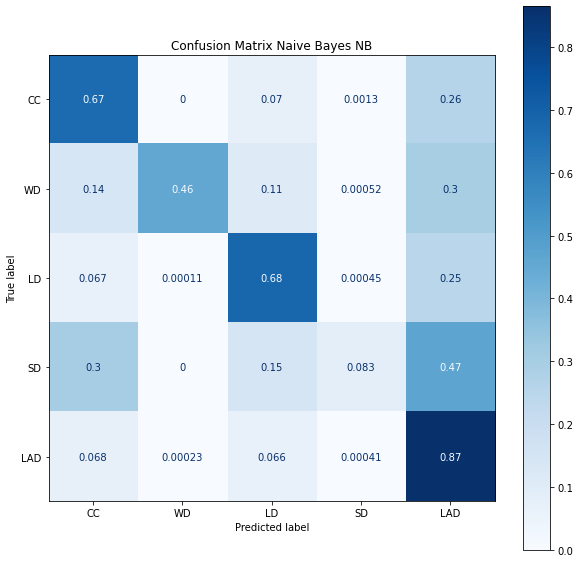

Log Loss: 0.641
              precision    recall  f1-score   support

          CC       0.85      0.67      0.75     17432
          WD       0.99      0.46      0.63      1920
          LD       0.70      0.68      0.69      8862
          SD       0.20      0.08      0.12       109
         LAD       0.67      0.87      0.75     17213

    accuracy                           0.74     45536
   macro avg       0.68      0.55      0.59     45536
weighted avg       0.76      0.74      0.73     45536



In [25]:
# Confusion Matrix
disp, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(GaussNB_model,delay_parameters_test, delay_results_test,labels = [0,1,2,3,4],
                             cmap=plt.cm.Blues,ax=ax,normalize='true')

# Plot confusion matrix
title = "Confusion Matrix Naive Bayes NB"

ax.set_title(title)
x_ticks_labels = ['CC','WD','LD','SD','LAD']
plt.xticks([0,1,2,3,4],x_ticks_labels)
plt.yticks([0,1,2,3,4],x_ticks_labels)
print(title)
print(disp.confusion_matrix)

plt.show()

# Calculate Predict Probability

delay_results_test_prep = GaussNB_model.predict_proba(delay_parameters_test) 

# This provides the probability of each flight belonging to one of the five classes.

LogLoss = log_loss(delay_results_test, delay_results_test_prep)

# Print Results

print("Log Loss: {:.3f}".format((LogLoss)))

# Class names

delay_results_test_predicted = GaussNB_model.predict(delay_parameters_test)

class_names = ['CC','WD','LD','SD','LAD']
print(classification_report(delay_results_test, delay_results_test_predicted, target_names=class_names))

This algorithm had the best Log Loss score so far. Also the compilation time of this algorithm vs the KNN was better.

A summary of the results above is presented:

|       Model Name       	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:----------------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
| Naive Bayes GaussianNB 	|   0.738  	|   0.641  	|   0.73   	|    0.76   	|  0.74  	|

## Decision Trees 

Based on the [Decisions Tree sklean documentation](https://scikit-learn.org/stable/modules/tree.html#tree), these type of algorithms are particularly good for multicategorical data like the one being used here.

We start by importing the model:

In [26]:
# Import tree model

from sklearn import tree

# Prepare the data - using the same random seed and test size of 20%
delay_parameters_train, delay_parameters_test, delay_results_train, delay_results_test = train_test_split(
    delay_parameters, delay_results, test_size = 0.20, random_state = 25) # Train 80%, Test 20%


print("\ndelay_parameters_test shape: " + str(delay_parameters_test.shape) + "\n")
print("\ndelay_results_test shape: " + str(delay_results_test.shape)+ "\n")

# Setup the model
Dtree_model = tree.DecisionTreeClassifier(random_state=50)

# Train the model

Dtree_model.fit(delay_parameters_train, delay_results_train)


delay_parameters_test shape: (45536, 27)


delay_results_test shape: (45536,)



DecisionTreeClassifier(random_state=50)

Now that the model has been created it would be tested with the designated datasets.

In [27]:
print("Training set score: {:.3f}\n".format(Dtree_model.score(delay_parameters_train, delay_results_train)))

print("Test set score: {:.3f}\n".format(Dtree_model.score(delay_parameters_test, delay_results_test)))

Training set score: 1.000

Test set score: 0.997



The accuracy of the model is over 99% for both datasets. However, its important to consider the complexity of the generated model. The code below would provide some inside into that.

In [28]:
print("Decision Tree depth: {:.3f}\n".format(Dtree_model.get_depth()))
print("Decision Tree number of leaves: {:.3f}\n".format(Dtree_model.get_n_leaves()))

Decision Tree depth: 15.000

Decision Tree number of leaves: 473.000



The results above indicate that the Tree has a size or depth of 15 elements and 473 leaves total.

The rest of the metrics would be evaluated below:

Confusion Matrix Decision Trees
[[9.98336393e-01 1.14731528e-04 9.75217990e-04 0.00000000e+00
  5.73657641e-04]
 [2.08333333e-03 9.92187500e-01 2.08333333e-03 0.00000000e+00
  3.64583333e-03]
 [2.48250959e-03 1.12841345e-03 9.94357933e-01 1.12841345e-04
  1.91830287e-03]
 [0.00000000e+00 0.00000000e+00 9.17431193e-03 9.63302752e-01
  2.75229358e-02]
 [9.87625632e-04 4.06669378e-04 8.13338756e-04 1.16191251e-04
  9.97676175e-01]]


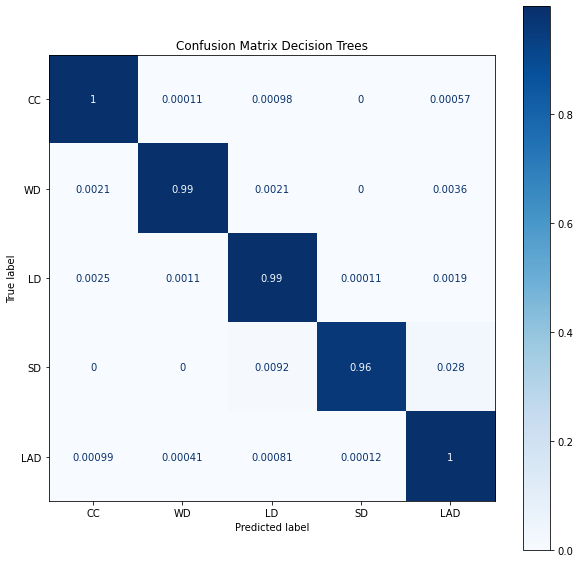


Log Loss Decision Tree: 0.105

              precision    recall  f1-score   support

          CC       1.00      1.00      1.00     17432
          WD       0.99      0.99      0.99      1920
          LD       1.00      0.99      1.00      8862
          SD       0.97      0.96      0.97       109
         LAD       1.00      1.00      1.00     17213

    accuracy                           1.00     45536
   macro avg       0.99      0.99      0.99     45536
weighted avg       1.00      1.00      1.00     45536



In [29]:
#Confusion Matrix
disp, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(Dtree_model,delay_parameters_test, delay_results_test,labels = [0,1,2,3,4],
                             cmap=plt.cm.Blues,ax=ax,normalize='true')

# Plot confusion matrix
title = "Confusion Matrix Decision Trees"

ax.set_title(title)
x_ticks_labels = ['CC','WD','LD','SD','LAD']
plt.xticks([0,1,2,3,4],x_ticks_labels)
plt.yticks([0,1,2,3,4],x_ticks_labels)
print(title)
print(disp.confusion_matrix)

plt.show()

# Calculate Predict Probability

delay_results_test_prep = Dtree_model.predict_proba(delay_parameters_test) 

# This provides the probability of each flight belonging to one of the five classes.

LogLoss = log_loss(delay_results_test, delay_results_test_prep)

# Print Results

print("\nLog Loss Decision Tree: {:.3f}\n".format((LogLoss)))

# Class names

delay_results_test_predicted = Dtree_model.predict(delay_parameters_test)

class_names = ['CC','WD','LD','SD','LAD']
print(classification_report(delay_results_test, delay_results_test_predicted, target_names=class_names))

As it can be seen the results of the algorithm are outstanding. In the table below it is possible to see a summary of the results:

|   Model Name  	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:-------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
| Decision Tree 	|   0.997  	|   0.105  	|   1.00   	|    1.00   	|  1.00  	|

### Random Forest

The Random Forest algorithm was included due to the low scores obtained with the KNN algorithm. Based on its documentation [here], this well suited for multiclass classification problems like this one. 

The first step is to load the model

In [30]:
# Load Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Prepare the data - using the same random seed and test size of 20%
delay_parameters_train, delay_parameters_test, delay_results_train, delay_results_test = train_test_split(
    delay_parameters, delay_results, test_size = 0.20, random_state = 25) # Train 80%, Test 20%


print("\ndelay_parameters_test shape: " + str(delay_parameters_test.shape) + "\n")
print("\ndelay_results_test shape: " + str(delay_results_test.shape)+ "\n")

# Setup the model
Rforest_model = RandomForestClassifier(n_estimators=100)

# Train the model

Rforest_model.fit(delay_parameters_train, delay_results_train)


delay_parameters_test shape: (45536, 27)


delay_results_test shape: (45536,)



RandomForestClassifier()

**Important:** The model was compiled with the default number of estimators or trees in the forest. Based on the results of training and test accuracy more values could be tested.

In [31]:
print("Training set score: {:.3f}\n".format(Rforest_model.score(delay_parameters_train, delay_results_train)))

print("Test set score: {:.3f}\n".format(Rforest_model.score(delay_parameters_test, delay_results_test)))

Training set score: 1.000

Test set score: 0.998



The results for the random forest are very good compared to the ones for the Decision Tree, however, the compilation time was longer. We will evaluate several values of trees $[5,10,25,50,75,100]$ to compare its results. 

In [32]:
# Setup Arrays to keep accuracy data
Train_Accuracy_RF = []
Test_Accuracy_RF = []

N_Trees_settings = [1,5,10,25,50,75,100] # Test values
for n_trees in N_Trees_settings:
    # Setup Model with "Ball Three Algorithm"
    
    Rforest_model = RandomForestClassifier(n_estimators=n_trees)
    Rforest_model.fit(delay_parameters_train, delay_results_train)
    
    # Pring Accuracy Results
    
    train_acc= Rforest_model.score(delay_parameters_train, delay_results_train)
    Train_Accuracy_RF.append(train_acc)
    
    test_acc = Rforest_model.score(delay_parameters_test, delay_results_test)
    Test_Accuracy_RF.append(test_acc)
    
    print("Training set score: {:.3f}".format(train_acc) + " \t -> N_Trees = " + str(n_trees))
    print("Test set score: {:.3f}".format(test_acc)+ " \t\t -> N_Trees = " + str(n_trees))

Training set score: 0.992 	 -> N_Trees = 1
Test set score: 0.978 		 -> N_Trees = 1
Training set score: 0.999 	 -> N_Trees = 5
Test set score: 0.991 		 -> N_Trees = 5
Training set score: 1.000 	 -> N_Trees = 10
Test set score: 0.995 		 -> N_Trees = 10
Training set score: 1.000 	 -> N_Trees = 25
Test set score: 0.997 		 -> N_Trees = 25
Training set score: 1.000 	 -> N_Trees = 50
Test set score: 0.998 		 -> N_Trees = 50
Training set score: 1.000 	 -> N_Trees = 75
Test set score: 0.997 		 -> N_Trees = 75
Training set score: 1.000 	 -> N_Trees = 100
Test set score: 0.998 		 -> N_Trees = 100


Now we plot the results above

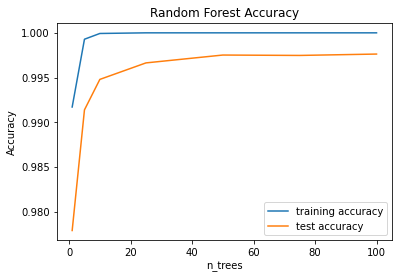

In [33]:
plt.plot(N_Trees_settings, Train_Accuracy_RF, label="training accuracy")
plt.plot(N_Trees_settings, Test_Accuracy_RF, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_trees")
plt.title("Random Forest Accuracy")
plt.legend()

As it can be seen above, the number of trees doe snot seem to have a strong effect in the accuracy values. Now we will calculate the rest of the metrics

Confusion Matrix Decision Trees
[[9.98795319e-01 0.00000000e+00 4.01560349e-04 0.00000000e+00
  8.03120698e-04]
 [1.56250000e-03 9.91666667e-01 5.20833333e-04 0.00000000e+00
  6.25000000e-03]
 [2.14398556e-03 7.89889415e-04 9.94809298e-01 0.00000000e+00
  2.25682690e-03]
 [9.17431193e-03 0.00000000e+00 0.00000000e+00 9.63302752e-01
  2.75229358e-02]
 [8.13338756e-04 0.00000000e+00 4.06669378e-04 0.00000000e+00
  9.98779992e-01]]


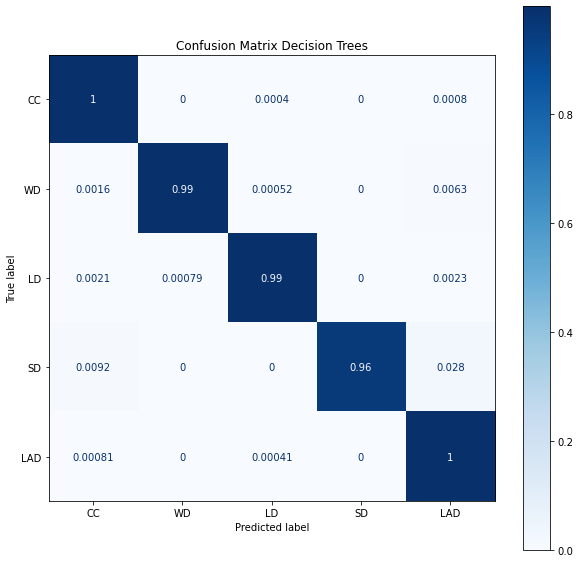


Log Loss Decision Tree: 0.024

              precision    recall  f1-score   support

          CC       1.00      1.00      1.00     17432
          WD       1.00      0.99      0.99      1920
          LD       1.00      0.99      1.00      8862
          SD       1.00      0.96      0.98       109
         LAD       1.00      1.00      1.00     17213

    accuracy                           1.00     45536
   macro avg       1.00      0.99      0.99     45536
weighted avg       1.00      1.00      1.00     45536



In [34]:
#Confusion Matrix
disp, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(Rforest_model,delay_parameters_test, delay_results_test,labels = [0,1,2,3,4],
                             cmap=plt.cm.Blues,ax=ax,normalize='true')

# Plot confusion matrix
title = "Confusion Matrix Decision Trees"

ax.set_title(title)
x_ticks_labels = ['CC','WD','LD','SD','LAD']
plt.xticks([0,1,2,3,4],x_ticks_labels)
plt.yticks([0,1,2,3,4],x_ticks_labels)
print(title)
print(disp.confusion_matrix)

plt.show()

# Calculate Predict Probability

delay_results_test_prep = Rforest_model.predict_proba(delay_parameters_test) 

# This provides the probability of each flight belonging to one of the five classes.

LogLoss = log_loss(delay_results_test, delay_results_test_prep)

# Print Results

print("\nLog Loss Decision Tree: {:.3f}\n".format((LogLoss)))

# Class names

delay_results_test_predicted = Rforest_model.predict(delay_parameters_test)

class_names = ['CC','WD','LD','SD','LAD']
print(classification_report(delay_results_test, delay_results_test_predicted, target_names=class_names))

As it was mentioned above, the results were exceptional even this type of unbalanced classes. In the table below its a summary fo the results.

|        Model Name       	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:-----------------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
| Random Forest 100 trees 	|   0.997  	|   0.024  	|   1.00   	|    1.00   	|  1.00  	|

## Ada Boost Classifier

The Ada Boost algorith documentation can be found [here](https://scikit-learn.org/stable/modules/ensemble.html#adaboost). This algoritm relies on a serious of weak classifiers working together. These are small decissions trees that are combined into what could be consider a **strong** classifier.

Its very popular for multiclass classification due to how easy is to train a lot of these weak classifiers. The efectivity of the algorithm depends on the number of weak classifeirs.

First we start by importing the model

In [35]:
# Import the model
from sklearn.ensemble import AdaBoostClassifier

# Prepare the data - using the same random seed and test size of 20%
delay_parameters_train, delay_parameters_test, delay_results_train, delay_results_test = train_test_split(
    delay_parameters, delay_results, test_size = 0.20, random_state = 25, stratify=delay_results) # Train 80%, Test 20%


print("\ndelay_parameters_test shape: " + str(delay_parameters_test.shape) + "\n")
print("\ndelay_results_test shape: " + str(delay_results_test.shape)+ "\n")

# Setup Arrays to keep accuracy data
Train_Accuracy_AB = []
Test_Accuracy_AB = []

N_Trees_settings = [1,5,10,25,50,75,100] # Test values
for n_trees in N_Trees_settings:
    # Setup Model
    
    ABClassifier_model = RandomForestClassifier(n_estimators=n_trees)
    ABClassifier_model.fit(delay_parameters_train, delay_results_train)
    
    # Pring Accuracy Results
    
    train_acc= ABClassifier_model.score(delay_parameters_train, delay_results_train)
    Train_Accuracy_AB.append(train_acc)
    
    test_acc = ABClassifier_model.score(delay_parameters_test, delay_results_test)
    Test_Accuracy_AB.append(test_acc)
    
    print("Training set score: {:.3f}".format(train_acc) + " \t -> N_Classifiers = " + str(n_trees))
    print("Test set score: {:.3f}".format(test_acc)+ " \t\t -> N_Classifiers = " + str(n_trees))



delay_parameters_test shape: (45536, 27)


delay_results_test shape: (45536,)

Training set score: 0.994 	 -> N_Classifiers = 1
Test set score: 0.984 		 -> N_Classifiers = 1
Training set score: 1.000 	 -> N_Classifiers = 5
Test set score: 0.993 		 -> N_Classifiers = 5
Training set score: 1.000 	 -> N_Classifiers = 10
Test set score: 0.995 		 -> N_Classifiers = 10
Training set score: 1.000 	 -> N_Classifiers = 25
Test set score: 0.997 		 -> N_Classifiers = 25
Training set score: 1.000 	 -> N_Classifiers = 50
Test set score: 0.997 		 -> N_Classifiers = 50
Training set score: 1.000 	 -> N_Classifiers = 75
Test set score: 0.998 		 -> N_Classifiers = 75
Training set score: 1.000 	 -> N_Classifiers = 100
Test set score: 0.998 		 -> N_Classifiers = 100


As it can be seen above after 10 Classifiers is not really worth increasing its number.

In the section below the rest of the metrics would be calculated.

Confusion Matrix Ada Boost
[[9.98854525e-01 0.00000000e+00 3.43642612e-04 0.00000000e+00
  8.01832761e-04]
 [2.64830508e-03 9.89406780e-01 2.11864407e-03 0.00000000e+00
  5.82627119e-03]
 [1.69281120e-03 1.01568672e-03 9.96050107e-01 0.00000000e+00
  1.24139488e-03]
 [9.34579439e-03 0.00000000e+00 1.86915888e-02 9.34579439e-01
  3.73831776e-02]
 [3.48432056e-04 0.00000000e+00 4.06504065e-04 0.00000000e+00
  9.99245064e-01]]


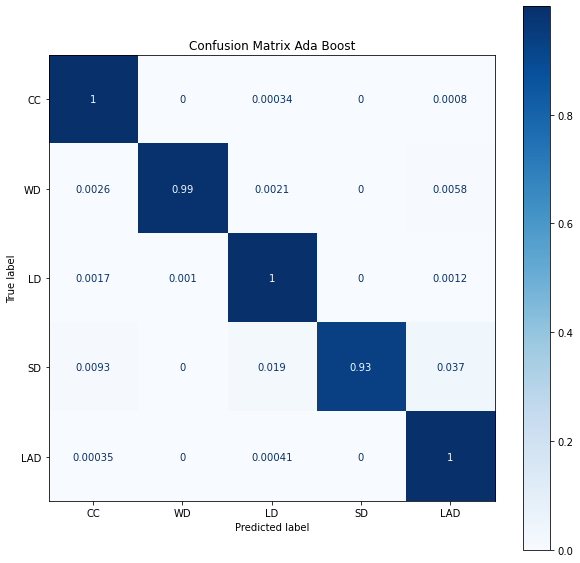


Log Loss Ada Boost: 0.024

              precision    recall  f1-score   support

          CC       1.00      1.00      1.00     17460
          WD       1.00      0.99      0.99      1888
          LD       1.00      1.00      1.00      8861
          SD       1.00      0.93      0.97       107
         LAD       1.00      1.00      1.00     17220

    accuracy                           1.00     45536
   macro avg       1.00      0.98      0.99     45536
weighted avg       1.00      1.00      1.00     45536



In [36]:
#Confusion Matrix
disp, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(ABClassifier_model,delay_parameters_test, delay_results_test,labels = [0,1,2,3,4],
                             cmap=plt.cm.Blues,ax=ax,normalize='true')

# Plot confusion matrix
title = "Confusion Matrix Ada Boost"

ax.set_title(title)
x_ticks_labels = ['CC','WD','LD','SD','LAD']
plt.xticks([0,1,2,3,4],x_ticks_labels)
plt.yticks([0,1,2,3,4],x_ticks_labels)
print(title)
print(disp.confusion_matrix)

plt.show()

# Calculate Predict Probability

delay_results_test_prep = ABClassifier_model.predict_proba(delay_parameters_test) 

# This provides the probability of each flight belonging to one of the five classes.

LogLoss = log_loss(delay_results_test, delay_results_test_prep)

# Print Results

print("\nLog Loss Ada Boost: {:.3f}\n".format((LogLoss)))

# Class names

delay_results_test_predicted = ABClassifier_model.predict(delay_parameters_test)

class_names = ['CC','WD','LD','SD','LAD']
print(classification_report(delay_results_test, delay_results_test_predicted, target_names=class_names))

As it can be seen this algorithm has excelent results even with unbalanced datatypes like the flight data. In the table below its possible to see a summary of these results

|      Model Name      	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:--------------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
| Ada Boost  100 trees 	|   0.998  	|   0.025  	|   1.00   	|    1.00   	|  1.00  	|

## Compare all algorithms

In the following table there is a summarry of all evaluated algorithms and their respective metrics:

|              Model Name              	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:------------------------------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
|          Logistic Regression         	|   0.969  	|   1.609  	|   0.84   	|    0.98   	|  0.80  	|
|       KNN Classification  k=100      	|   0.515  	|   1.168  	|   0.48   	|    0.50   	|  0.51  	|
|        Naive Bayes GaussianNB        	|   0.738  	|   0.641  	|   0.73   	|    0.76   	|  0.74  	|
| Decision Trees 15 trees - 473 leaves 	|   0.997  	|   0.105  	|   1.00   	|    1.00   	|  1.00  	|
|       Random Forest  100 trees       	|   0.997  	|   0.024  	|   1.00   	|    1.00   	|  1.00  	|
|         Ada Boost  100 trees         	|   0.998  	|   0.025  	|   1.00   	|    1.00   	|  1.00  	|

### Discussion

The best results were obtained by the **Random Forest Algorithm**, this decision was wade on the Logaritmic Loss value which is a metric that allows to evaluate the preddition of all the classes combined. When there is a multiclass classification problems, the metrics of accuracy, F1 Score, Precission and Recall could be hard to interpretate and sometimes when averaging them between classes they could hide issues with the classification of single classes. For example the **Logistic Regression** algorithm had a precision of 98%, but a Recall of only 80%. The Recall helps to understand what is the percentage of the actual positives that was identified correctly. When reviewing the **Logistic Regression** algorithm confusion matrix, it is possible to see how the class 'SD' presented a large number of false negatives. This behavior is clearly represented on the fact that the logarithmic loss of this algorithm was the highest.

The reason of why these results could be hard to analyze, it is the fact that the classes were clearly unbalanced. However, after proprocessing the data it was decided that it was important to understand all the reported root causes of delayed flights by the [BTS or Bureau of Transportation Statistics](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations) of the United States. As it can be seen in the image below:

**Note:** Run the code below to see the image. It did not work following the Markdown documente [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#images).

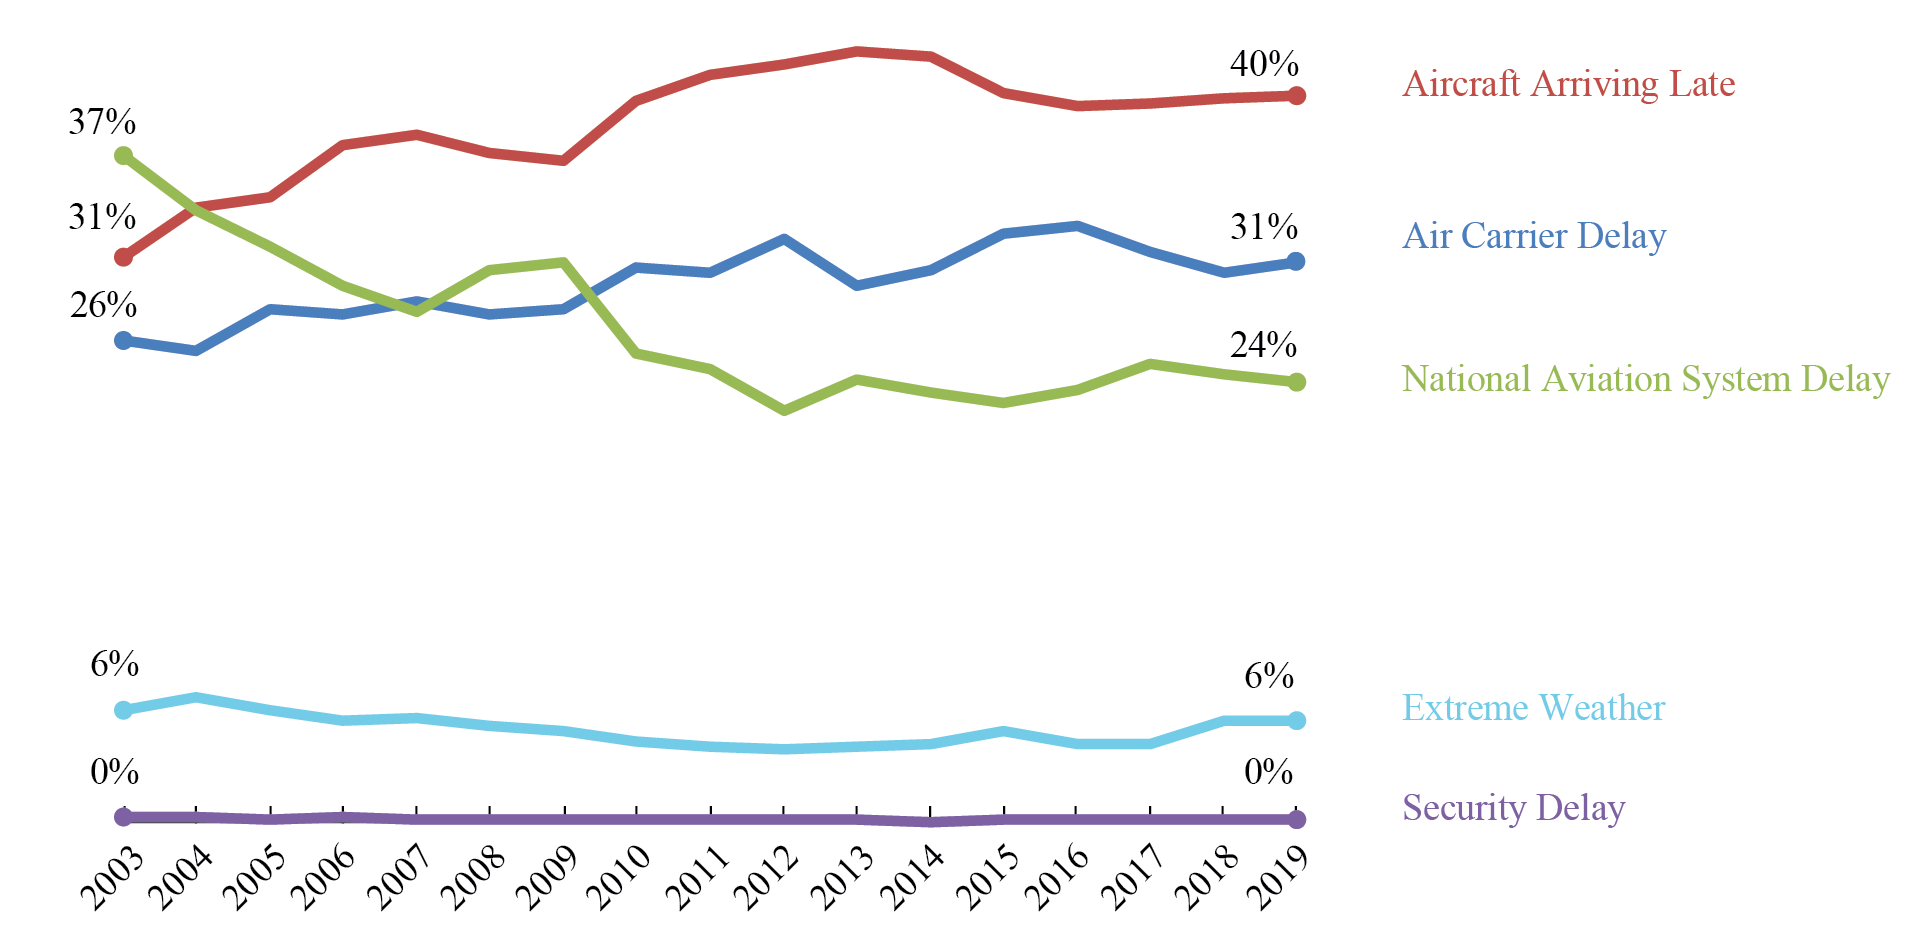

In [37]:
from IPython.display import Image
Image("images/Delay Cause by Year, 2003-2019 crop.png")

#source: https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations

Since the nature of the data is unbalanced it was important to find an algorithm that was able to work properly in this situations. Both the **Decision Trees** and **Random Forest** algorithms worked pretty and yielded excellent results nearly with perfect acurracies and almost a value of zero in the **logaritmic loss**. However, both algorithms required a long time to compile in comparrisson to the Ada Boost algorithm. Due to this the **Ada Boost** algorithm should be consider the **best** in this analysis.  